In [1]:
!pip install pandas
!pip install yfinance

import pandas as pd
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 10.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 12.3 MB/s eta 0:00:0031m13.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 6.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 8.8 MB/s eta 0:00:00 MB/s eta 0:00:01
You should consider upgrading via the '/home/hachan/stock-market-analytic/my-venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 KB 211.6 kB/s eta 0:00:0031m33.4 MB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 KB 1.8 M

# Question 1
### Average growth of GDP in 2023

In [6]:
df = pd.read_csv("dataset/gdpc1.csv")
previous_df = df.shift(periods=4)

result_df = df.join(previous_df, rsuffix="_prev")
result_df.columns = [column.lower() for column in result_df.columns]
result_df['date'] = pd.to_datetime(result_df['date'])
result_df["growth_rate"] = (result_df["gdpc1"] / result_df["gdpc1_prev"] - 1) * 100

print(round(result_df[result_df['date'].dt.year == 2023]['growth_rate'].mean(), 1))


2.5


# Question 2
### Inverse Treasury Yield

In [5]:
dgs10 = pd.read_csv("dataset/dgs10.csv")
dgs2 = pd.read_csv("dataset/dgs2.csv")

dgs10 = dgs10[dgs10['DATE'].notnull() == True].set_index('DATE')
dgs2 = dgs2[dgs2['DATE'].notnull() == True].set_index('DATE')
dgs_df = dgs10.join(dgs2, rsuffix="_2")

dgs_df['DGS10'] = pd.to_numeric(dgs_df['DGS10'], errors='coerce')
dgs_df['DGS2'] = pd.to_numeric(dgs_df['DGS2'], errors='coerce')
dgs_df["diff"] = dgs_df['DGS10'] - dgs_df['DGS2']

print(round(dgs_df[~dgs_df['diff'].isna()]['diff'].min(), 1))

-1.1


# Question 3
### Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

In [10]:
start_date = "2019-04-09"
end_date = "2024-04-09"

sp500 = yf.download("^GSPC", start=start_date, end=end_date)["Adj Close"]
ipc_mexico = yf.download("^MXX", start=start_date, end=end_date)["Adj Close"]

# Calculate 5-year growth percentages
sp500_growth = ((sp500.iloc[-1] / sp500.iloc[0]) - 1) * 100
ipc_mexico_growth = ((ipc_mexico.iloc[-1] / ipc_mexico.iloc[0]) - 1) * 100

# Identify the largest growth
largest_growth = max(sp500_growth, ipc_mexico_growth)
print(round(largest_growth))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

81


# Question 4
### 52-weeks range ratio (2023) for the selected stocks
### Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

In [16]:
start_date = "2023-01-01"
end_date = "2023-12-31"
sar = yf.download("2222.SR", start=start_date, end=end_date)["Adj Close"]
brkb = yf.download("BRK-B", start=start_date, end=end_date)["Adj Close"]
aapl = yf.download("AAPL", start=start_date, end=end_date)["Adj Close"]
msft = yf.download("MSFT", start=start_date, end=end_date)["Adj Close"]
goog = yf.download("GOOG", start=start_date, end=end_date)["Adj Close"]
jpm = yf.download("JPM", start=start_date, end=end_date)["Adj Close"]

sar_ratio = (sar.max() - sar.min()) / sar.max()
brkb_ratio = (brkb.max() - brkb.min()) / brkb.max()
aapl_ratio = (aapl.max() - aapl.min()) / aapl.max()
msft_ratio = (msft.max() - msft.min()) / msft.max()
goog_ratio = (goog.max() - goog.min()) / goog.max()
jpm_ratio = (jpm.max() - jpm.min()) / jpm.max()
print(round(max([sar_ratio, brkb_ratio, aapl_ratio, msft_ratio, goog_ratio, jpm_ratio]), 2))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

0.42


# Question 5. [Stocks] Dividend Yield
### Find the largest dividend yield for the same set of stocks

In [18]:
sar_div = yf.Ticker("2222.SR").dividends
brkb_div = yf.Ticker("BRK-B").dividends
aapl_div = yf.Ticker("AAPL").dividends
msft_div = yf.Ticker("MSFT").dividends
goog_div = yf.Ticker("GOOG").dividends
jpm_div = yf.Ticker("JPM").dividends

sar_y = (sar_div[sar_div.index.year == 2023].sum() / sar.iloc[-1]) * 100
brkb_y = (brkb_div[brkb_div.index.year == 2023].sum() / brkb.iloc[-1]) * 100
aapl_y = (aapl_div[aapl_div.index.year == 2023].sum() / aapl.iloc[-1]) * 100
msft_y = (msft_div[msft_div.index.year == 2023].sum() / msft.iloc[-1]) * 100
goog_y = (goog_div[goog_div.index.year == 2023].sum() / goog.iloc[-1]) * 100
jpm_y = (jpm_div[jpm_div.index.year == 2023].sum() / jpm.iloc[-1]) * 100

print(round(max([sar_y, brkb_y, aapl_y, msft_y, goog_y, jpm_y]), 1))



2.8


In [2]:
!pip install matplotlib
!pip install cpi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 7.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 3.4 MB/s eta 0:00:004.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 5.7 MB/s eta 0:00:00
You should consider upgrading via the '/home/hachan/stock-market-analytic/my-venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.7/31.7 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 7.6 MB/s eta 0:00:00
You should consider upgrading via the '/home/hachan/stock-market-analytic/my-venv/bin/python -m pip install --up

[*********************100%%**********************]  1 of 1 completed


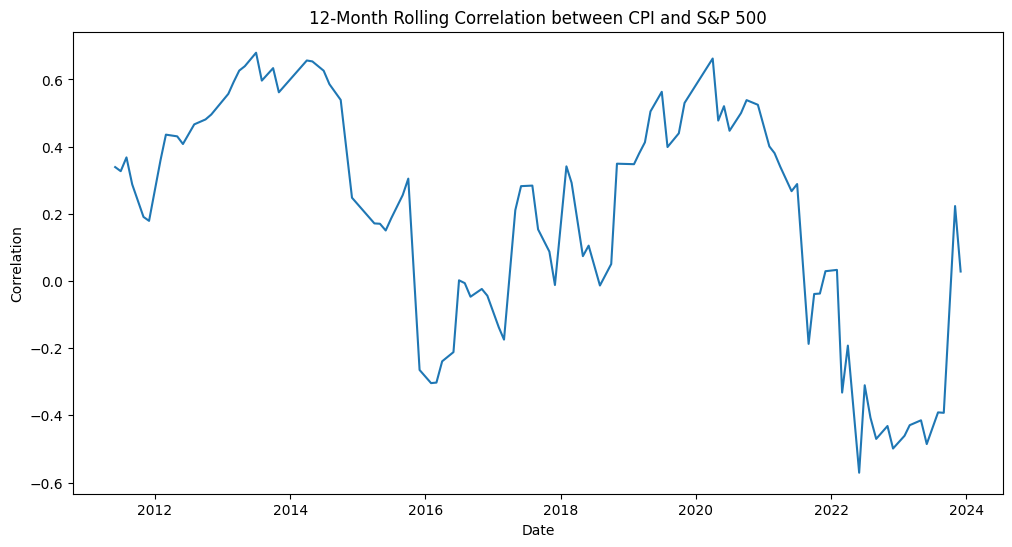

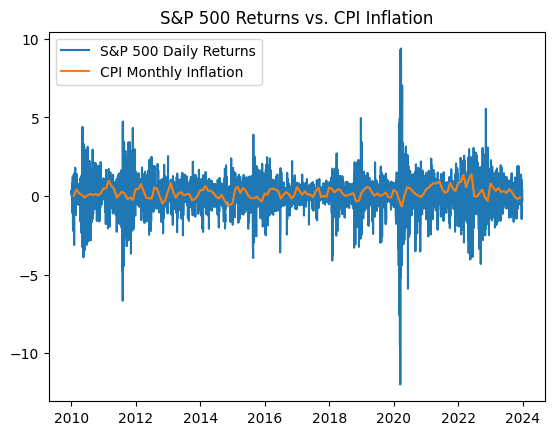

Correlation coefficient between S&P 500 returns and CPI inflation:             CPI
DATE           
2010-02-01  NaN
2010-03-01  NaN
2010-04-01  NaN
2010-05-01  NaN
2010-06-01  NaN
...         ...
2023-08-01  NaN
2023-09-01  NaN
2023-10-01  NaN
2023-11-01  NaN
2023-12-01  NaN

[167 rows x 1 columns]


In [15]:
from datetime import date

start_date = date(2010, 1, 1)
end_date = date(2023, 12, 31)

sp500 = yf.download("^GSPC", start=start_date, end=end_date)["Close"]

# Calculate annual percentage change for S&P 500
sp500_returns = (sp500.pct_change() * 100).dropna()

# Get monthly CPI data
monthly_cpi = []
for year in range(start_date.year, end_date.year + 1):
    for month in range(1, 13):
        try:
            cpi_date = date(year, month, 1)
            cpi_value = cpi.get(cpi_date)
            monthly_cpi.append([cpi_date, cpi_value])
        except:
            pass

cpi_df = pd.DataFrame(monthly_cpi, columns=['DATE', 'CPI'])
cpi_df.set_index('DATE', inplace=True)
cpi_inflation = (cpi_df.pct_change() * 100).dropna()  # Calculate monthly percentage change, drop NA

# Combine the two datasets
data = pd.DataFrame({'S&P 500': sp500, 'CPI': cpi_df['CPI']}).dropna()
# Calculate the monthly percentage change
data = data.pct_change()
# Calculate the 12-month rolling correlation
rolling_corr = data['S&P 500'].rolling(12).corr(data['CPI'])

# Plot the rolling correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr)
plt.title('12-Month Rolling Correlation between CPI and S&P 500')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.show()

# Analyze the relationship (plotting, correlation, etc.)
plt.plot(sp500_returns.index, sp500_returns, label="S&P 500 Daily Returns")
plt.plot(cpi_inflation.index, cpi_inflation, label="CPI Monthly Inflation")
plt.legend()
plt.title("S&P 500 Returns vs. CPI Inflation")
plt.show()

# Calculate correlation coefficient (optional)
correlation = sp500_returns.rolling(12).corr(cpi_inflation)
print("Correlation coefficient between S&P 500 returns and CPI inflation:", correlation)
